# Car Price prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
car_price=pd.read_csv(r"C:\Users\mayank\Desktop\mayank\oasis infobytes\car prediction\car data.csv")
car_price

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
car_price.shape

(301, 9)

In [5]:
car_price.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
car_price.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
car_price.columns.value_counts()

Car_Name         1
Year             1
Selling_Price    1
Present_Price    1
Driven_kms       1
Fuel_Type        1
Selling_type     1
Transmission     1
Owner            1
dtype: int64

In [8]:
car_price.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
car_price.Year.value_counts()

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

In [10]:
car_price.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [11]:
car_price.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [12]:
car_price.Owner.value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [13]:
car_price['Car_age'] = 2023-car_price['Year']
car_price.drop('Year',axis=1,inplace=True)

In [14]:
car_price

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,7
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,8
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,14
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,6


<function matplotlib.pyplot.show(close=None, block=None)>

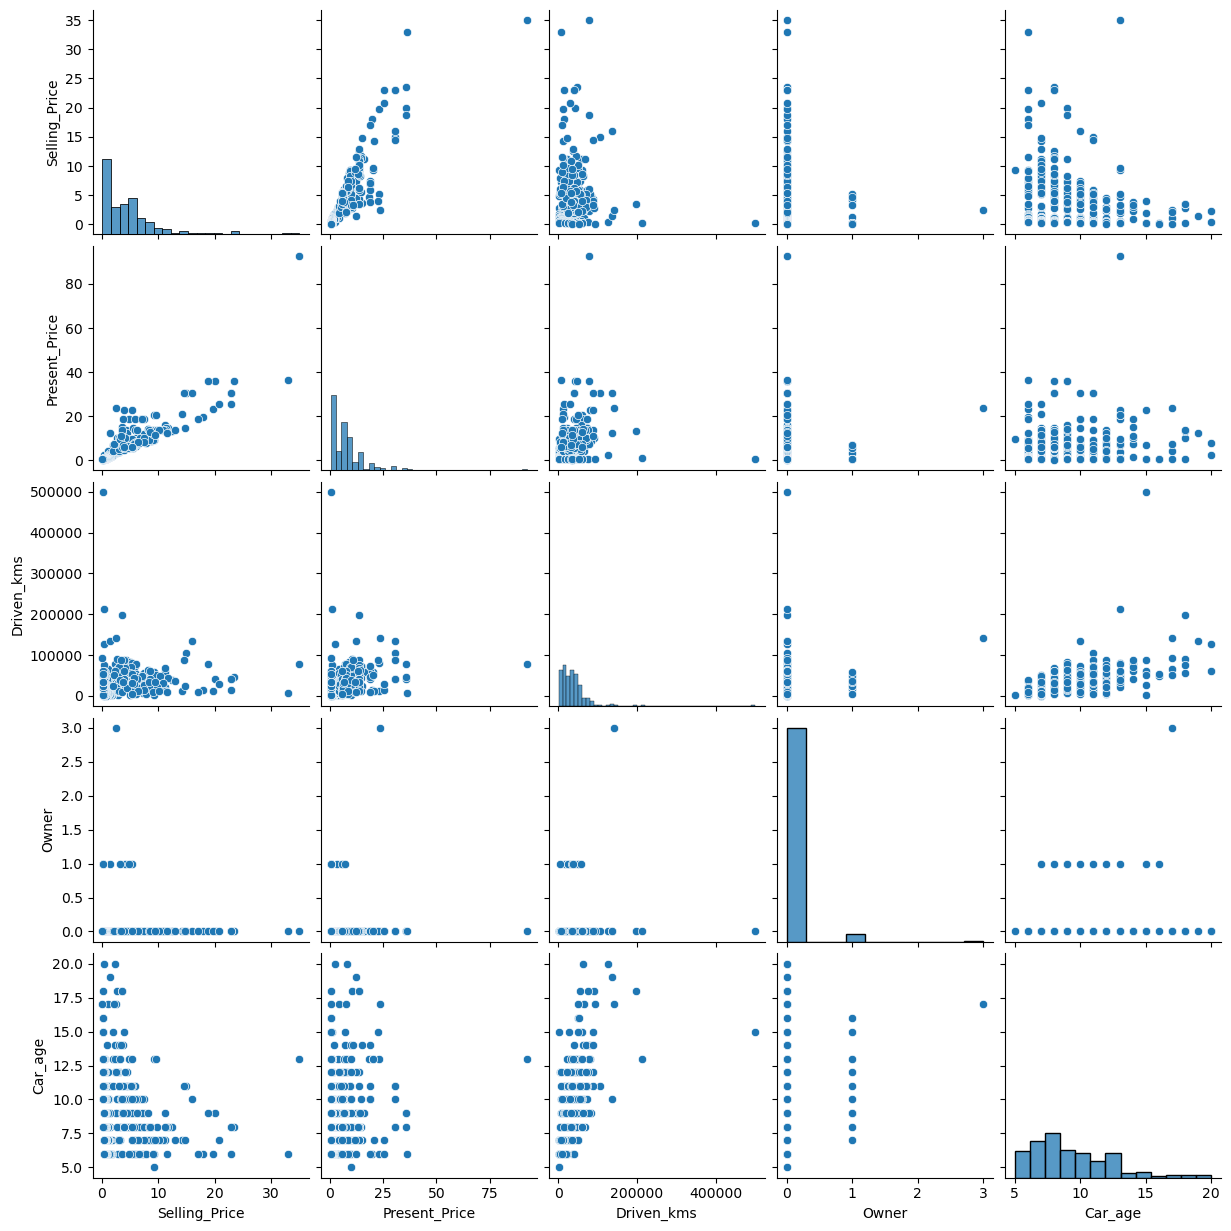

In [15]:
sns.pairplot(car_price)
plt.show

In [16]:
car_price.drop('Car_Name',axis=1,inplace=True)

In [17]:
car_price

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,7
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,8
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,14
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,6


In [18]:
car_price.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace = True)
car_price.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace = True)
car_price.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace = True)

car_price.head()

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_age
0,3.35,5.59,27000,0,0,0,0,9
1,4.75,9.54,43000,1,0,0,0,10
2,7.25,9.85,6900,0,0,0,0,6
3,2.85,4.15,5200,0,0,0,0,12
4,4.60,6.87,42450,1,0,0,0,9


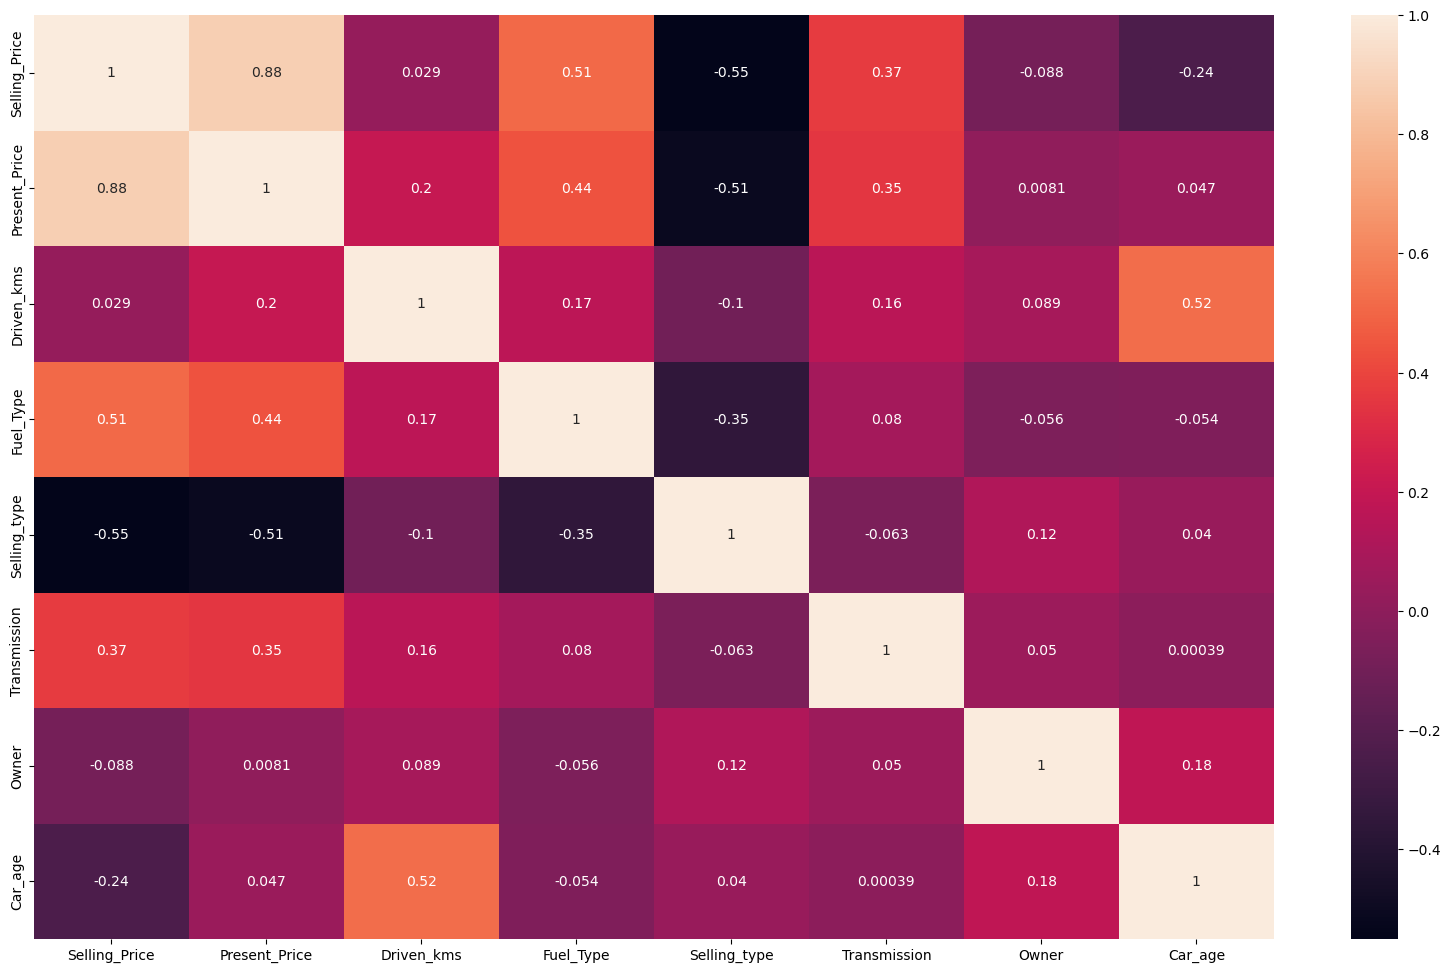

In [19]:
plt.figure(figsize=(20,12))
sns.heatmap(car_price.corr(), annot=True)
plt.show()

<Axes: xlabel='Transmission', ylabel='count'>

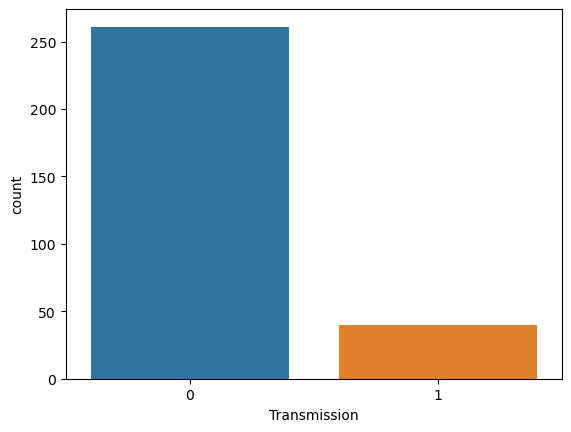

In [20]:
sns.countplot(car_price, x="Transmission")

<Axes: xlabel='Fuel_Type', ylabel='count'>

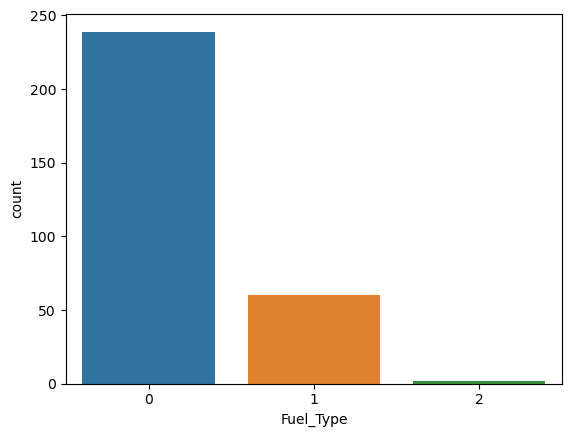

In [21]:
sns.countplot(car_price, x="Fuel_Type")
#car_price.lenged(Labels= ['Petrol', 'Diesel', 'CNG'])

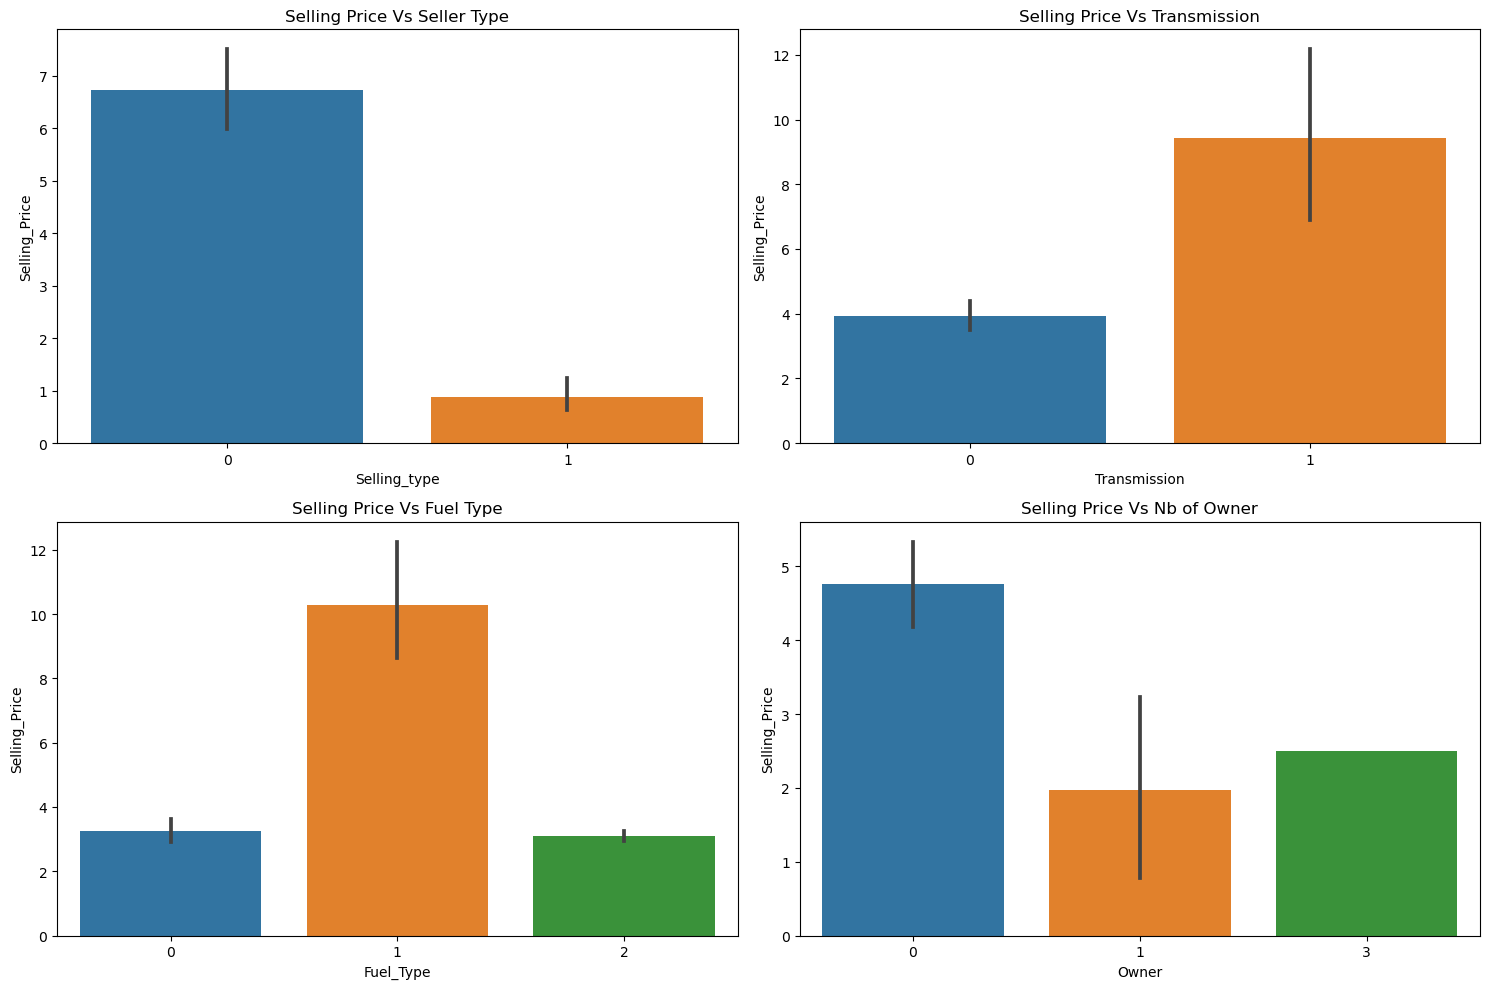

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(data=car_price,x='Selling_type',y='Selling_Price')
plt.title('Selling Price Vs Seller Type')

plt.subplot(2,2,2)
sns.barplot(data=car_price,x='Transmission',y='Selling_Price')
plt.title('Selling Price Vs Transmission')

plt.subplot(2,2,3)
sns.barplot(data=car_price,x='Fuel_Type',y='Selling_Price')
plt.title('Selling Price Vs Fuel Type')

plt.subplot(2,2,4)
sns.barplot(data=car_price,x='Owner',y='Selling_Price')
plt.title('Selling Price Vs Nb of Owner')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Selling Price Vs Nb of Owner')

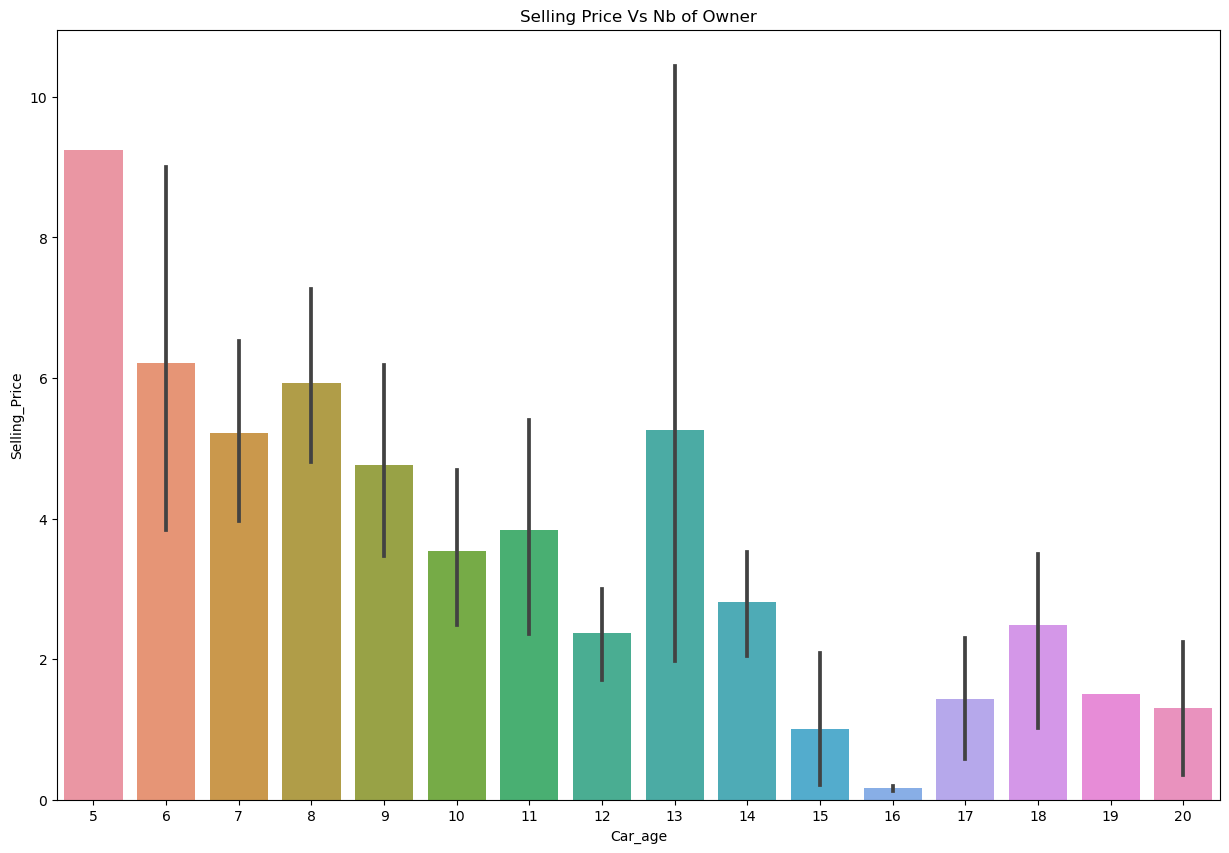

In [23]:
plt.figure(figsize=(15,10))
sns.barplot(data=car_price,x='Car_age',y='Selling_Price')
plt.title('Selling Price Vs Nb of Owner')

In [24]:
car_price.columns

Index(['Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Selling_type', 'Transmission', 'Owner', 'Car_age'],
      dtype='object')

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [26]:
car_price.head()

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_age
0,3.35,5.59,27000,0,0,0,0,9
1,4.75,9.54,43000,1,0,0,0,10
2,7.25,9.85,6900,0,0,0,0,6
3,2.85,4.15,5200,0,0,0,0,12
4,4.60,6.87,42450,1,0,0,0,9


In [27]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(car_price, train_size=0.8, random_state=100)

In [28]:
num_vars=['Selling_Price','Present_Price','Driven_kms','Car_age']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_age
41,0.068599,0.039662,0.092505,0,0,0,0,0.266667
160,0.008324,0.006827,0.047047,0,1,0,0,0.466667
206,0.160448,0.073797,0.023982,0,0,0,0,0.066667
59,0.569173,0.386216,0.081081,1,0,1,0,0.266667
162,0.008324,0.007261,0.028028,0,1,0,0,0.400000


## Dividing into X and Y sets for model building

In [29]:
y_train=df_train.pop("Selling_Price")
x_train=df_train

## RFE

In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [31]:
#running  RFE with the output number of the variable equal to 10
lm=LinearRegression()
lm.fit(x_train,y_train)
rfe=RFE(lm, n_features_to_select=6)
rfe=rfe.fit(x_train,y_train)

In [32]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('Present_Price', True, 1),
 ('Driven_kms', True, 1),
 ('Fuel_Type', True, 1),
 ('Selling_type', True, 1),
 ('Transmission', True, 1),
 ('Owner', False, 2),
 ('Car_age', True, 1)]

In [33]:
col=x_train.columns[rfe.support_]
col

Index(['Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type',
       'Transmission', 'Car_age'],
      dtype='object')

In [34]:
x_train.columns[~rfe.support_]

Index(['Owner'], dtype='object')

## Building the model with StatsModel, for detailed statistics

In [35]:
x_train_rfe=x_train[col]

In [36]:
import statsmodels.api as sm
x_train_rfe=sm.add_constant(x_train_rfe)

In [37]:
lm=sm.OLS(y_train,x_train_rfe).fit()

In [38]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     335.7
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.19e-111
Time:                        22:21:56   Log-Likelihood:                 393.81
No. Observations:                 240   AIC:                            -773.6
Df Residuals:                     233   BIC:                            -749.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0924      0.007     12.628      0.000       0.078       0.107
Present_Price     1.1012      0.042     26.228      0.000       1.019       1.184
Driven_kms       -0.0668      0.044     -1.501      0.135      -0.154       0.021
Fuel_Type         0.0500      0.009      5.829      0.000       0.033       0.067
Selling_type     -0.0346      0.008     -4.537      0.000      -0.050      -0.020
Transmission      0.0440      0.009      4.703      0.000       0.026       0.062
Car_age          -0.1708      0.019     -9.155      0.000      -0.208      -0.134
==============================================================================
Omnibus:                       29.683   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.616
Skew:                           0.452   Prob(JB):                     1.73e-21
Kurtosis:                       5.957   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
x_train_rfe=x_train_rfe.drop(["const"],axis=1)
x_train_rfe.columns

Index(['Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type',
       'Transmission', 'Car_age'],
      dtype='object')

In [40]:
#calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
X=x_train_rfe
vif['Features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Car_age,3.40
1,Driven_kms,2.62
0,Present_Price,2.58
2,Fuel_Type,1.66
3,Selling_type,1.56
4,Transmission,1.39


## Residual Analysis of the train data


In [44]:
num_vars=['Selling_Price','Present_Price','Driven_kms','Car_age']
df_test[num_vars]=scaler.transform(df_test[num_vars])

In [45]:
y_test=df_test.pop("Selling_Price")
x_test=df_test

In [52]:
#now lets use our model to make predictions
#creating x_test_new by dropping variable from x_test
x_test_new = x_test[x_train_rfe.columns]

#Adding a const variable
x_test_new = sm.add_constant(x_test_new)

In [53]:
y_pred = lm.predict(x_test_new)

In [54]:
lm=sm.OLS(y_pred,x_test_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.416e+30
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:39:46   Log-Likelihood:                 2135.9
No. Observations:                  61   AIC:                            -4258.
Df Residuals:                      54   BIC:                            -4243.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0924    5.5e-17   1.68e+15      0.000       0.092       0.092
Present_Price     1.1012   4.09e-16   2.69e+15      0.000       1.101       1.101
Driven_kms       -0.0668   6.85e-16  -9.75e+13      0.000      -0.067      -0.067
Fuel_Type         0.0500   5.11e-17    9.8e+14      0.000       0.050       0.050
Selling_type     -0.0346   5.68e-17  -6.09e+14      0.000      -0.035      -0.035
Transmission      0.0440   9.78e-17    4.5e+14      0.000       0.044       0.044
Car_age          -0.1708   1.82e-16  -9.37e+14      0.000      -0.171      -0.171
==============================================================================
Omnibus:                        2.295   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.317   Jarque-Bera (JB):                2.097
Skew:                          -0.359   Prob(JB):                        0.350
Kurtosis:                       2.443   Cond. No.                         38.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""